# Análise quantitativa - Partidos

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt 
%matplotlib notebook
import seaborn as sns

path = os.getcwd().replace('archives','')
path

'/home/davi/Documentos/MyProjects/esquerta_centro_direita/'

In [2]:
data = pd.read_csv(path + '/docs/result_data.csv')
data

,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,NUM FILIADOS
0,DEM,DEMOCRATAS,AC,1392,RIO BRANCO,1044
1,DEM,DEMOCRATAS,AC,1538,SENADOR GUIOMARD,255
2,DEM,DEMOCRATAS,AC,1457,SENA MADUREIRA,238
3,DEM,DEMOCRATAS,AC,1473,TARAUACÁ,201
4,DEM,DEMOCRATAS,AC,1007,BUJARI,150
...,...,...,...,...,...,...
83486,REDE,REDE SUSTENTABILIDADE,TO,93858,GURUPI,1
83487,REDE,REDE SUSTENTABILIDADE,TO,73610,BARRA DO OURO,1
83488,REDE,REDE SUSTENTABILIDADE,TO,92193,ANANÁS,1
83489,REDE,REDE SUSTENTABILIDADE,TO,73458,TUPIRAMA,1


In [3]:
# for i in range(len(data)):
#     print()
# ep = ['','CENTRO','DIREITA']
l = ['D','D','E','E','E','E','E','D','E','C','D','D','E','D','D','C','D','E','E','E','D','D','E','E']
ll = pd.unique(data['SIGLA DO PARTIDO'])
lll = []
for i in range(len(ll)):
    lll.append([ll[i] ,l[i]])
lll = np.array(lll)
lll

array([['DEM', 'D'],
       ['NOVO', 'D'],
       ['PCB', 'E'],
       ['PCO', 'E'],
       ['PDT', 'E'],
       ['PHS', 'E'],
       ['PMN', 'E'],
       ['PP', 'D'],
       ['PPL', 'E'],
       ['PROS', 'C'],
       ['PRP', 'D'],
       ['PRTB', 'D'],
       ['PSB', 'E'],
       ['PSC', 'D'],
       ['PSD', 'D'],
       ['PSDB', 'C'],
       ['PSL', 'D'],
       ['PSOL', 'E'],
       ['PSTU', 'E'],
       ['PT', 'E'],
       ['PTB', 'D'],
       ['PTC', 'D'],
       ['PV', 'E'],
       ['REDE', 'E']], dtype='<U4')

In [4]:
aux = []
for i in range(len(data)):
    for ii in range(len(lll)):
        if data.loc[i,'SIGLA DO PARTIDO']==lll[ii,0]:
            aux.append(lll[ii,1])
aux = np.array(aux)

In [5]:
len(aux)

83491

In [6]:
data['ESPECTRO POLITICO'] = aux

## Análise Quantitativa do Brasil

<IPython.core.display.Javascript object>


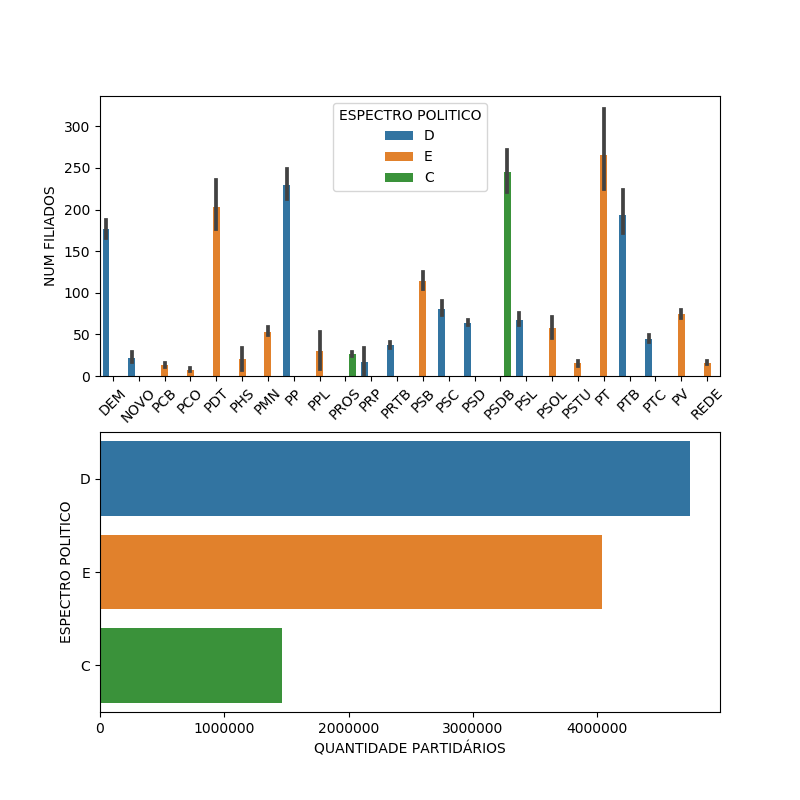

In [36]:
esp = pd.unique(data['ESPECTRO POLITICO'])

soma = []
for i in esp:
    soma.append(np.sum(data[data['ESPECTRO POLITICO']==i].loc[:,'NUM FILIADOS']))
soma = np.array(soma)

aux1 = pd.DataFrame(data=np.array([soma,esp]).T,columns=['QUANTIDADE PARTIDÁRIOS','ESPECTRO POLITICO'])

# print(aux1)
# fig,ax = plt.subplots(2,1,figsize=(9,8))
fig = plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.barplot(x='SIGLA DO PARTIDO',y='NUM FILIADOS',hue='ESPECTRO POLITICO',data=data)
plt.xticks(rotation=45)
# g.set_xticklabels(rotation=30)
plt.subplot(2,1,2)
sns.barplot(x='QUANTIDADE PARTIDÁRIOS',y='ESPECTRO POLITICO',data=aux1)
# ax[0].xticks(rotation=90)


## Análise Quantitativa por Região e Estados

In [224]:
states ={
    'Norte':[['AM','RR','AP','PA','TO','RO','AC']],
    'Nordeste':[['MA','PI','CE','RN','PE','PB','SE','AL','BA']],
    'Centro Oeste':[['MT','MS','GO']],
    'Sudeste':[['SP','RJ','ES','MG']],
    'Sul':[['PR','RS','SC']]
}
regioes = []
for iii in range(len(states)):
    regiao_ = []
    estados = list(states.values())[iii][0]
    for ii in estados:
        soma_state = []
        for i in esp:
            soma_state.append(np.sum(data[(data['UF']==ii) &(data['ESPECTRO POLITICO']==i)].loc[:,'NUM FILIADOS']))
        regiao_.append(np.array(soma_state))
    regioes.append(np.array(regiao_))
regioes = np.array(regioes)

In [225]:
data_estados = []
for i in range(5):
    _regiao = []
    ufs = []
    data_est = pd.DataFrame(data=regioes[i],columns=['DIREITA','ESQUERDA','CENTRO'])
    for ii in range(len(list(states.values())[i][0])):
        ufs.append(list(states.values())[i][0][ii])
        _regiao.append(list(states.keys())[i])
    data_est['UF'] = ufs
    data_est['REGIAO'] = _regiao
    
    data_estados.append(data_est)
result = pd.concat(data_estados)
result

,DIREITA,ESQUERDA,CENTRO,UF,REGIAO
0,72737,46716,17728,AM,Norte
1,19464,11450,5484,RR,Norte
2,24649,39624,9594,AP,Norte
3,140798,156832,45353,PA,Norte
4,61930,38448,18372,TO,Norte
5,48266,40203,17758,RO,Norte
6,15967,20157,7116,AC,Norte
0,170337,128826,36785,MA,Nordeste
1,93049,69503,26002,PI,Nordeste
2,132572,155157,55462,CE,Nordeste


<IPython.core.display.Javascript object>


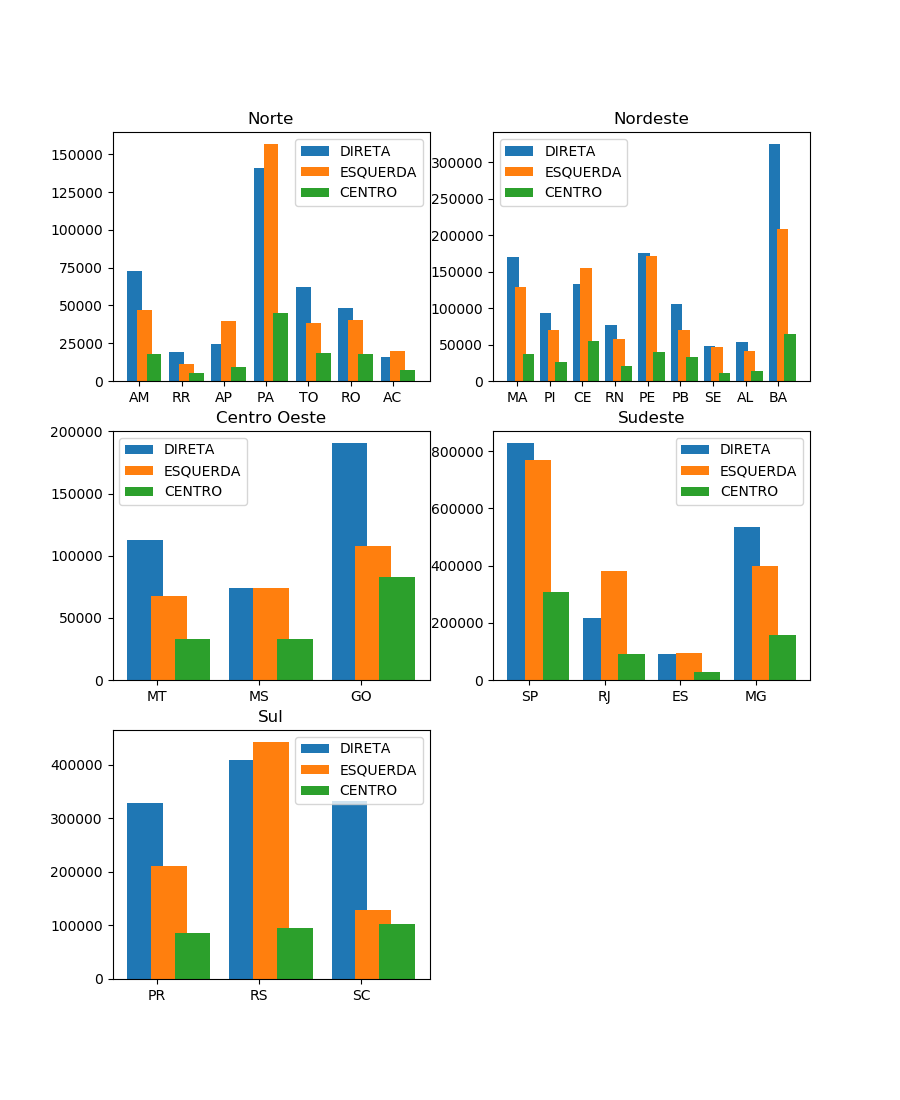

In [226]:
fig = plt.figure(figsize=(9,11))
for i in  range(len(pd.unique(result.loc[:,'REGIAO']))):
    plt.subplot(3,2,i+1)
    rg = result[result['REGIAO']==pd.unique(result.loc[:,'REGIAO'])[i]]
    x_axis = np.arange(len(rg.loc[:,'DIREITA']))
    width=0.35
    plt.bar(x_axis-width/3,rg.loc[:,'DIREITA'],width,label='DIRETA')
    plt.bar(x_axis+width/3,rg.loc[:,'ESQUERDA'],width,label='ESQUERDA')
    plt.bar(x_axis+width,rg.loc[:,'CENTRO'],width,label='CENTRO')
    plt.xticks(x_axis,list(rg.loc[:,'UF']))
    plt.title(pd.unique(result.loc[:,'REGIAO'])[i])
    plt.legend()

